<a href="https://colab.research.google.com/github/SamanMansoor/Data-Science/blob/main/Energy_Effinciency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Libraries**

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind
import matplotlib.pyplot as plt

# **Load Dataset**

In [40]:
df = pd.read_csv('/content/ENB2012_data (1).csv')
print(df.head())


     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


# **Check information about dataset**

In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None


# **Statistical Summary**

In [42]:
print(df.describe())

               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307201   24.587760  
std      0.133221    1.55096   10.090196    9.513306  
min      0.000000    0.00000    6.010000   10.900000  
25% 

# **Data Preprocessing**

In [43]:
df.isnull()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False


In [44]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

# **Data Visualization**

Text(0.5, 1.0, 'Distribution of Relative Compactness')

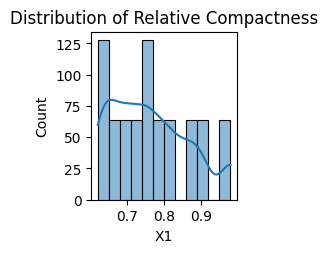

In [45]:
#Histogram of Relative Compactness (X1)
plt.subplot(2, 3, 1)
sns.histplot(df['X1'], kde=True)
plt.title('Distribution of Relative Compactness')

Text(0.5, 1.0, 'Scatter Plot: Relative Compactness vs.Cooling Load')

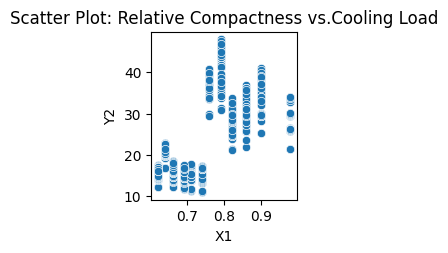

In [46]:
# Example: Scatter plot of X1 vs. Y2
plt.subplot(2, 3, 2)
sns.scatterplot(x='X1', y='Y2', data=df)
plt.title('Scatter Plot: Relative Compactness vs.Cooling Load')


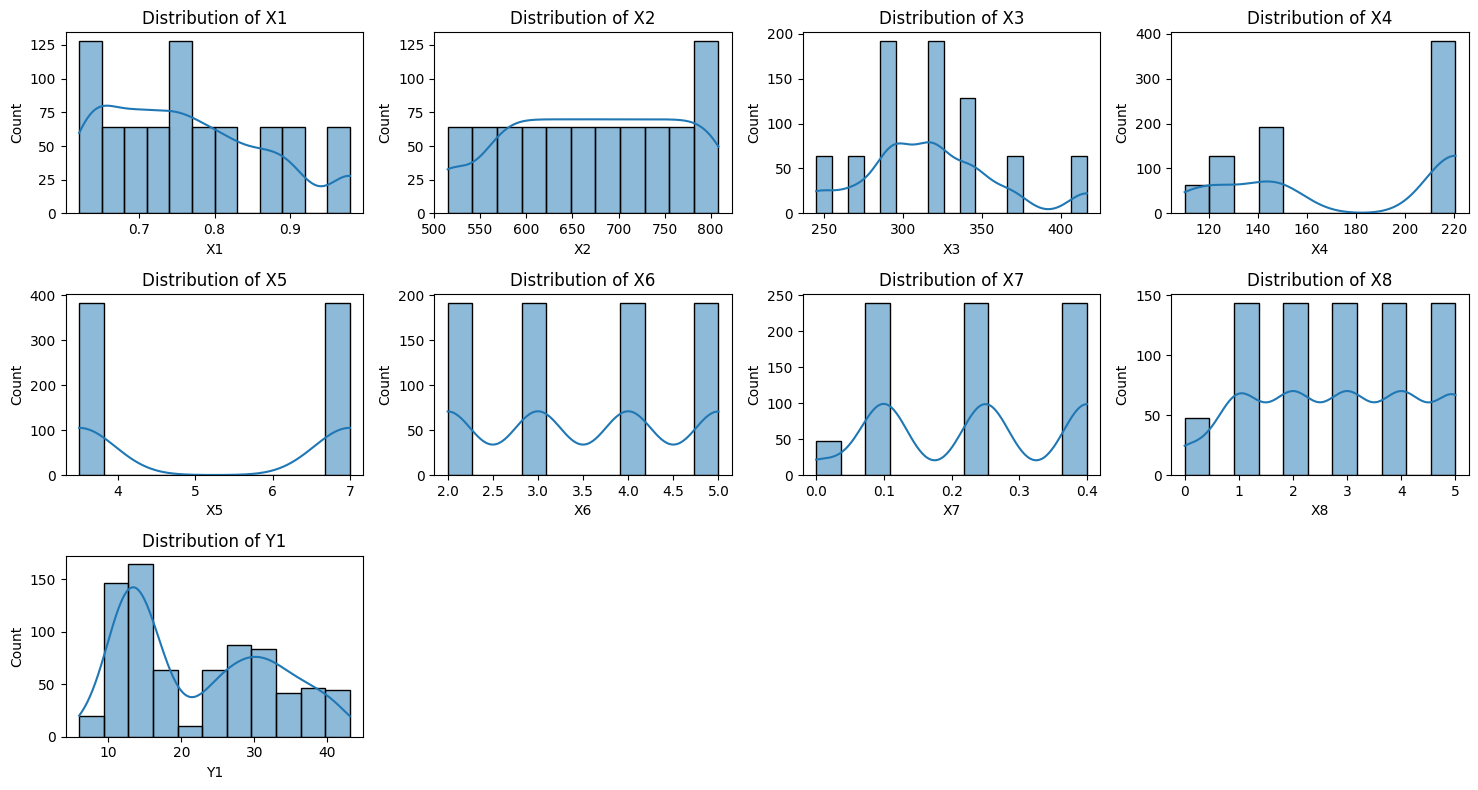

In [47]:
# Visualization of the distribution of features
plt.figure(figsize=(15, 8))

# Histograms of features
num_cols = len(df.columns) - 1  # Exclude the target variable
num_rows = (num_cols // 4) + (num_cols % 4 > 0)  # Calculate the number of rows needed

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(num_rows, 4, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


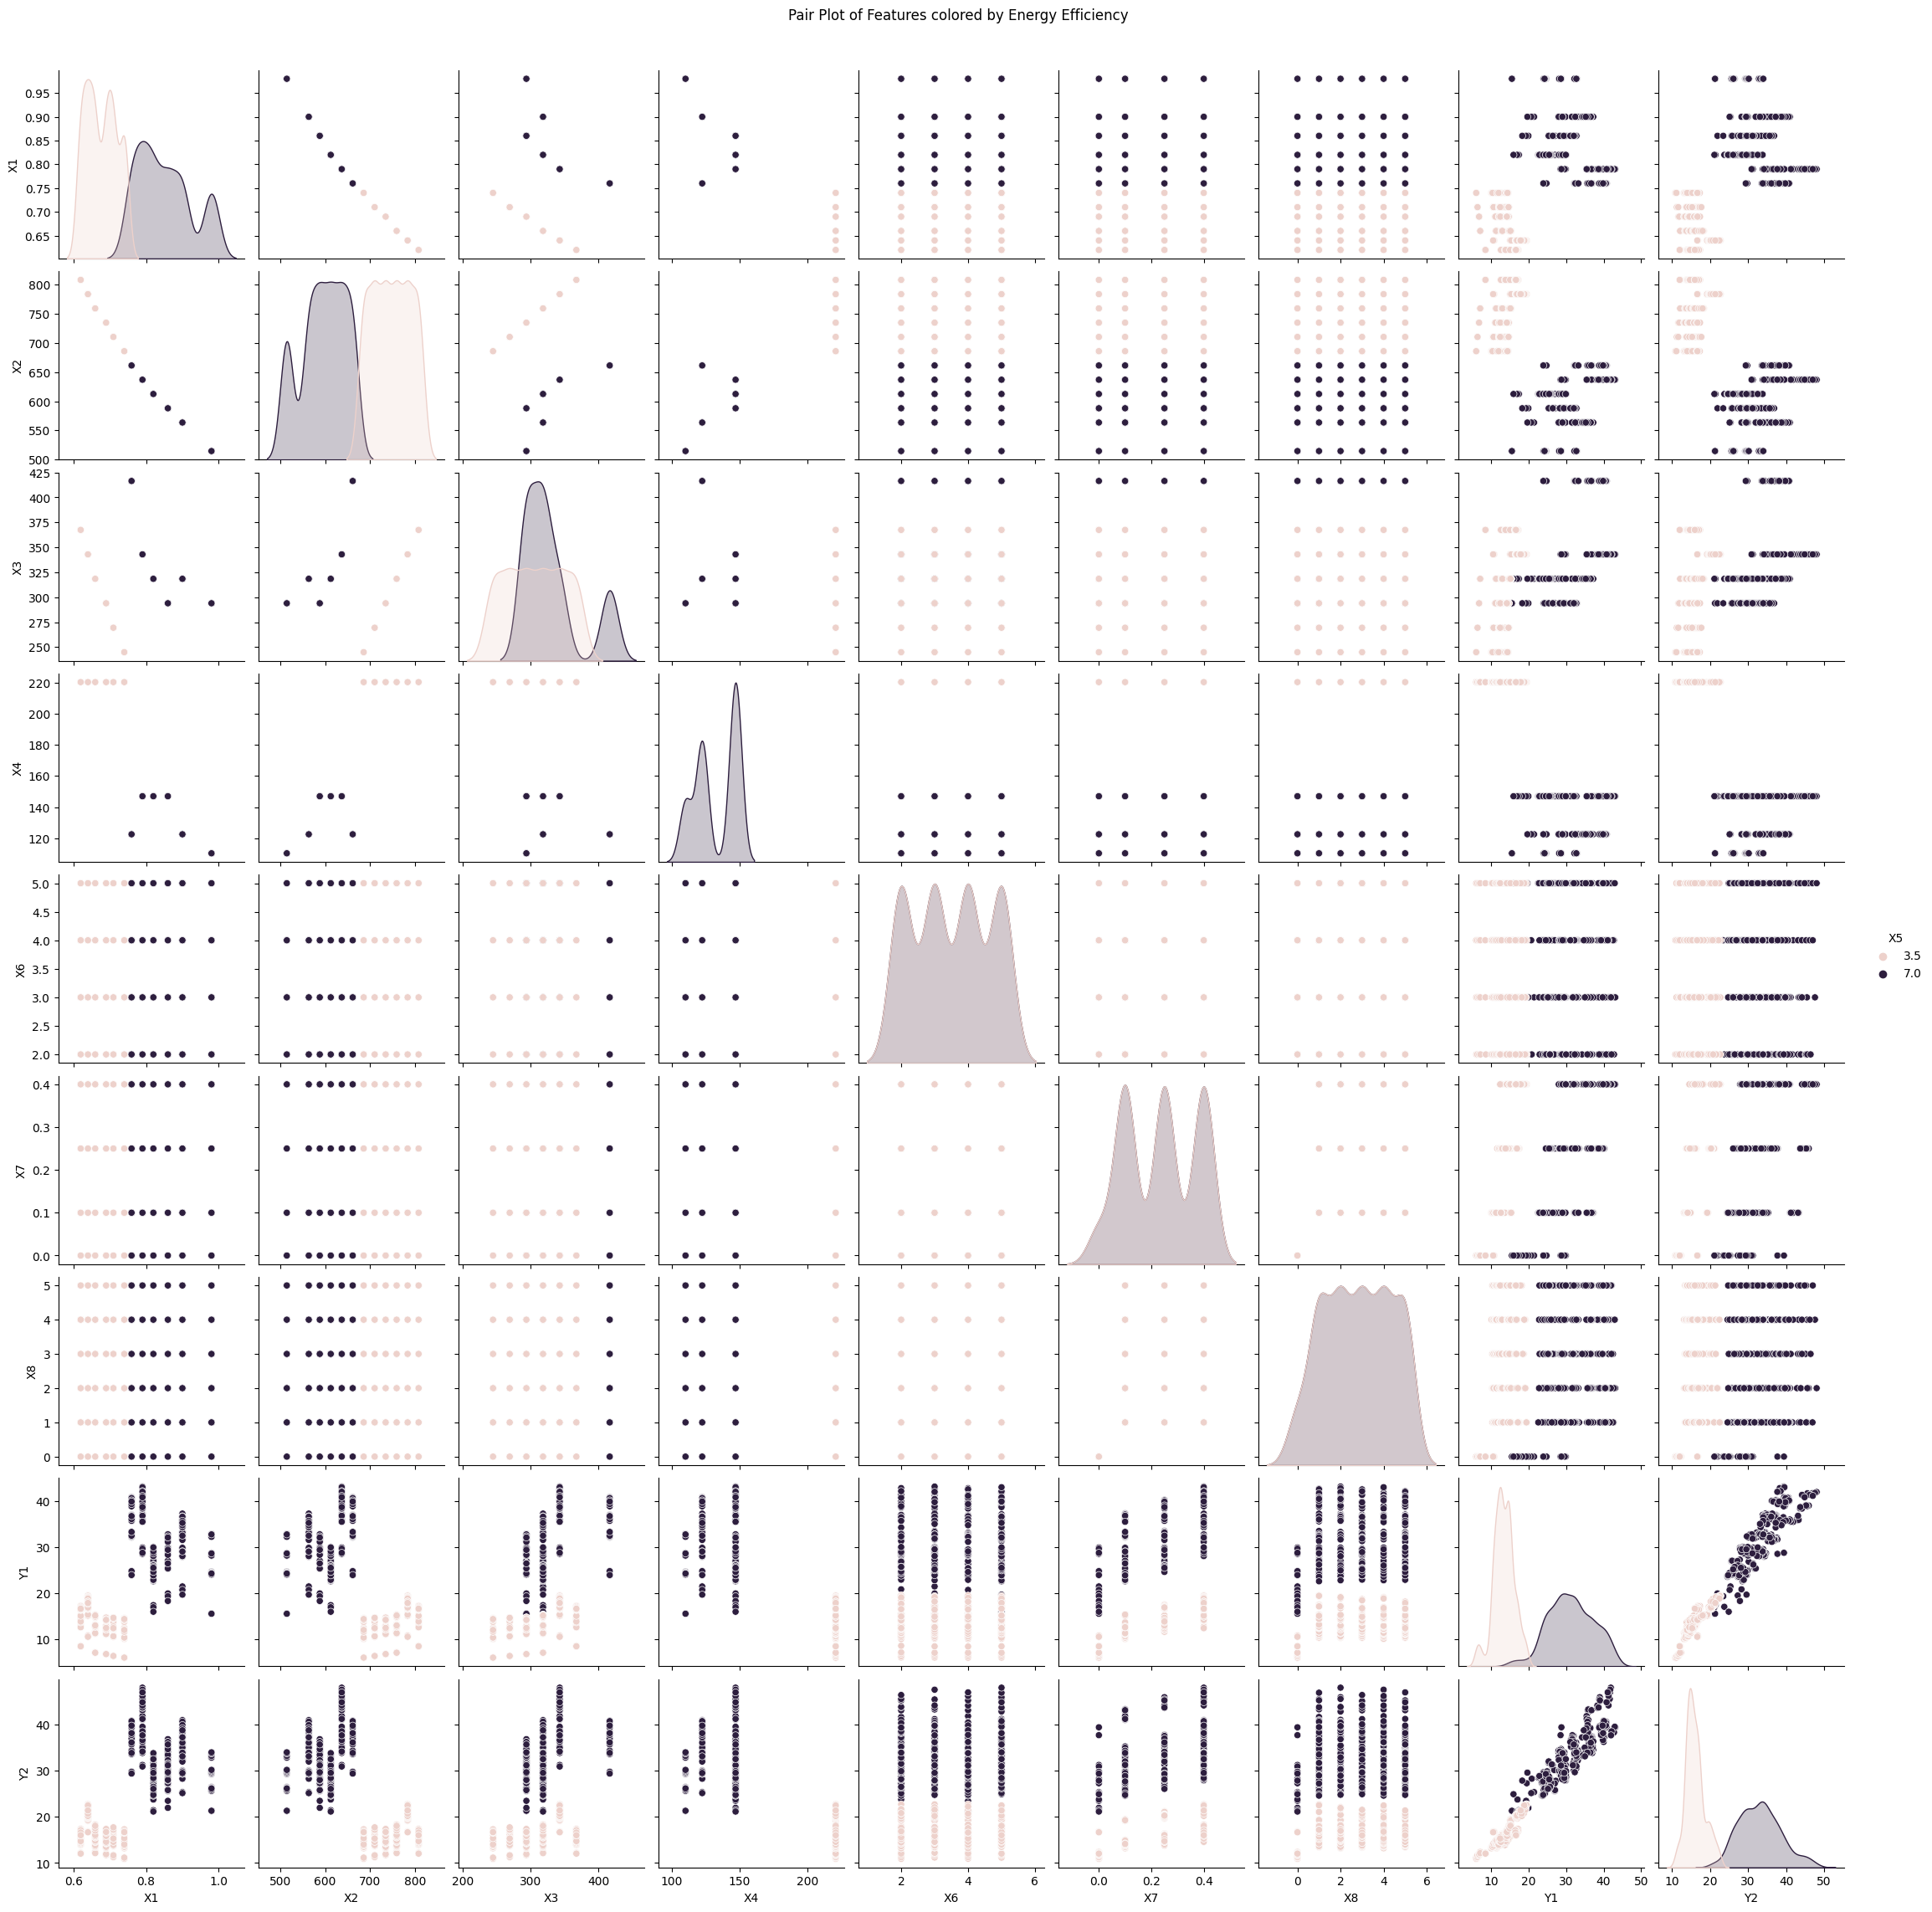

In [48]:
# Pair plots to visualize relationships between multiple variables
sns.pairplot(df, hue='X5')
plt.suptitle('Pair Plot of Features colored by Energy Efficiency', y=1.02)
plt.show()

# **Hypothesis testing - P-value**

In [49]:
# Hypothesis testing - Example for X1 and X8
corr_coefficient, p_value = pearsonr(df['X1'], df['X8'])
print(f'Correlation Coefficient: {corr_coefficient}')
print(f'P-value: {p_value}')


Correlation Coefficient: 8.648470730819682e-18
P-value: 0.9999999999999987


In [50]:
# Null hypothesis testing for X1 and Energy Efficiency
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant correlation.')
else:
    print('Fail to reject the null hypothesis: No significant correlation.')


Fail to reject the null hypothesis: No significant correlation.


In [51]:
# Hypothesis testing - Example for X1 and X3
corr_coefficient, p_value = pearsonr(df['X1'], df['X3'])
print(f'Correlation Coefficient: {corr_coefficient}')
print(f'P-value: {p_value}')

# Null hypothesis testing for X1 and Energy Efficiency
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant correlation.')
else:
    print('Fail to reject the null hypothesis: No significant correlation.')


Correlation Coefficient: -0.2037816803210381
P-value: 1.2117825815752537e-08
Reject the null hypothesis: There is a significant correlation.


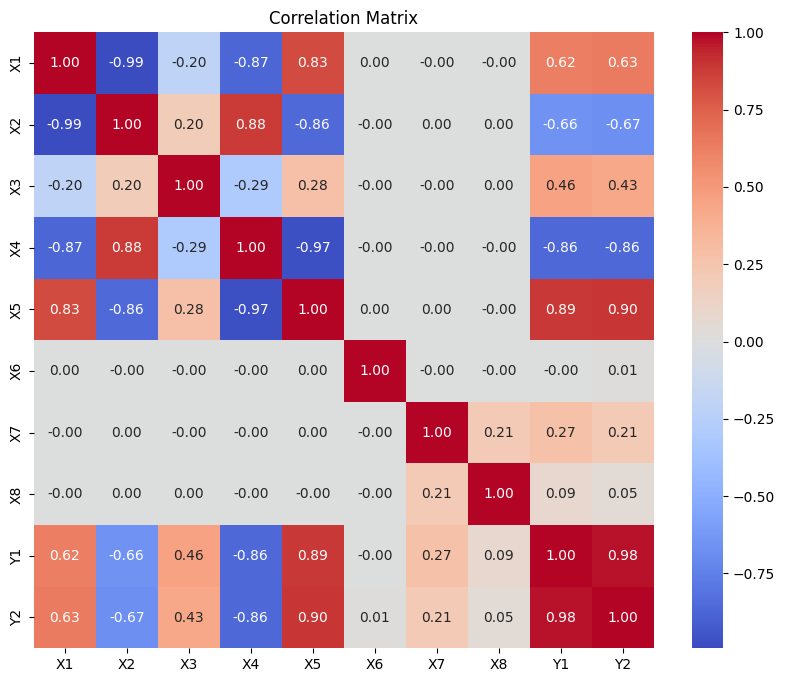

In [52]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

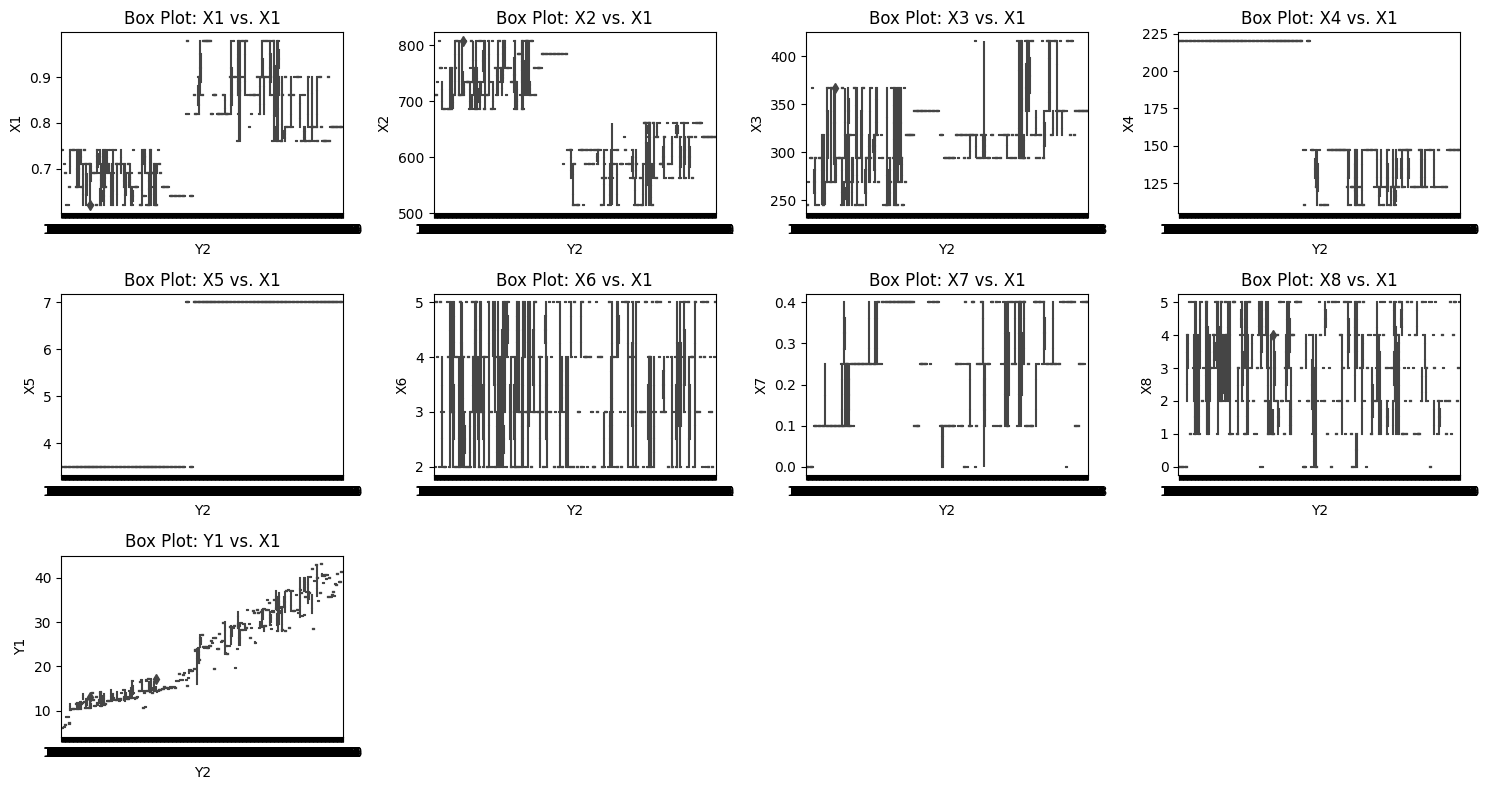

In [53]:
# Box plots to observe distribution of energy efficiency across categories
plt.figure(figsize=(15, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(num_rows, 4, i + 1)
    sns.boxplot(x='Y2', y=column, data=df)
    plt.title(f'Box Plot: {column} vs. X1')

plt.tight_layout()
plt.show()

# **Data Modelling**

# **Linear Regression**

Mean Squared Error: 4.162338165886164
R-squared: 0.9550781103875227


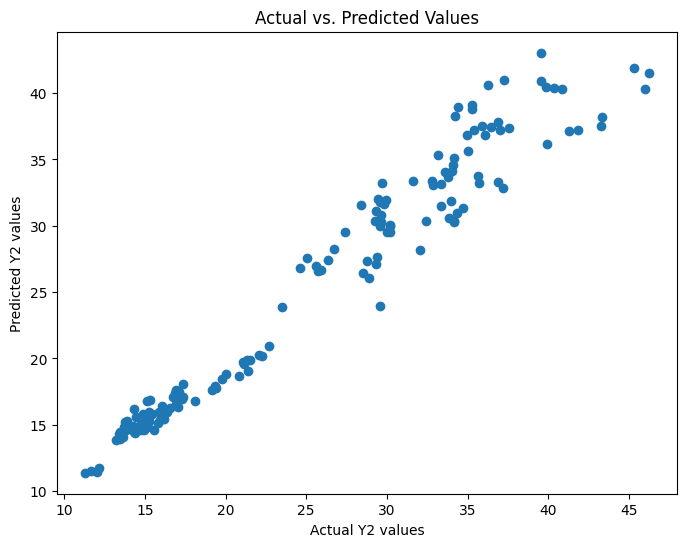

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the target variable (Y) and features (X)
X = df.drop('Y2', axis=1)  #  target variable (Cooling Load)
y = df['Y2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Y2 values')
plt.ylabel('Predicted Y2 values')
plt.title('Actual vs. Predicted Values')
plt.show()


# **Gradient Boosting Regressor**

Gradient Boosting - Mean Squared Error: 1.6165134059444406
Gradient Boosting - R-squared: 0.9825538353961527


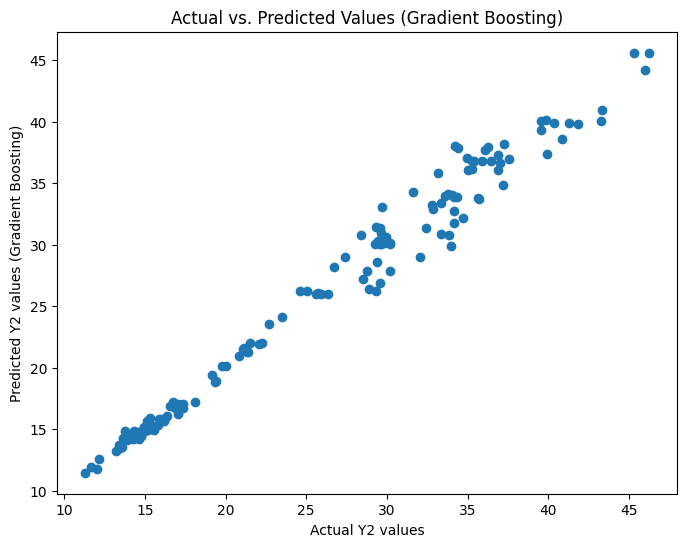

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()

# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
gb_y_pred = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print(f'Gradient Boosting - Mean Squared Error: {gb_mse}')
print(f'Gradient Boosting - R-squared: {gb_r2}')

# Visualize the predicted vs. actual values for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_y_pred)
plt.xlabel('Actual Y2 values')
plt.ylabel('Predicted Y2 values (Gradient Boosting)')
plt.title('Actual vs. Predicted Values (Gradient Boosting)')
plt.show()
